# Part One: Importing data & Preliminary Analysis

In [38]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [39]:
data = pd.read_csv('project2.data')

In [40]:
print(f'{data.shape}\n{data.size}')

(286, 10)
2860


The initial size of our data set is 2860 total elements, of which we have 286 rows and 10 columns. 

In [41]:
data.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [42]:
# renamed Column to fix typo & Add clarity to variable names
data = data.rename(columns={'irradiat': 'Irradiated','class': 'Recurrence' })
data.info()
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Recurrence   286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor-size   286 non-null    object
 4   inv-nodes    286 non-null    object
 5   node-caps    286 non-null    object
 6   deg-malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast-quad  286 non-null    object
 9   Irradiated   286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB
Recurrence     0
age            0
menopause      0
tumor-size     0
inv-nodes      0
node-caps      0
deg-malig      0
breast         0
breast-quad    0
Irradiated     0
dtype: int64


We see that a large majority of the datatypes are objects, this means we must do data type conversion for better use! In addition to this, we also see that have no null values! This is good, but that doesn't mean every value in our data is a good value.

## Data Pre-Processing & Data Tidying

In [43]:
# Indentifies all the unique values within our columns
for col in data:
    print(f'{col}: {data[col].unique()}\n')

Recurrence: ['no-recurrence-events' 'recurrence-events']

age: ['30-39' '40-49' '60-69' '50-59' '70-79' '20-29']

menopause: ['premeno' 'ge40' 'lt40']

tumor-size: ['30-34' '20-24' '15-19' '0-4' '25-29' '50-54' '10-14' '40-44' '35-39'
 '5-9' '45-49']

inv-nodes: ['0-2' '6-8' '9-11' '3-5' '15-17' '12-14' '24-26']

node-caps: ['no' 'yes' '?']

deg-malig: [3 2 1]

breast: ['left' 'right']

breast-quad: ['left_low' 'right_up' 'left_up' 'right_low' 'central' '?']

Irradiated: ['no' 'yes']



## Finding 'Bad' Values

In [44]:
data.loc[data['breast-quad'] == '?']

,Recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Irradiated
206,recurrence-events,50-59,ge40,30-34,0-2,no,3,left,?,no


In [45]:
data.loc[data['node-caps'] == '?']

,Recurrence,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,Irradiated
145,no-recurrence-events,40-49,premeno,25-29,0-2,?,2,left,right_low,yes
163,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_up,yes
164,no-recurrence-events,60-69,ge40,25-29,3-5,?,1,right,left_low,yes
183,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_up,yes
184,no-recurrence-events,50-59,ge40,30-34,9-11,?,3,left,left_low,yes
233,recurrence-events,70-79,ge40,15-19,9-11,?,1,left,left_low,yes
263,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_up,no
264,recurrence-events,50-59,lt40,20-24,0-2,?,1,left,left_low,no


In [46]:
print(data.duplicated().sum())
data.drop_duplicates(inplace=True, ignore_index=True)

14


In [47]:
print(data.duplicated().sum())

0


## Converting Data Types

In [48]:
# converts the yes's to 1's & the no's to 0's.
data['Irradiated'] = data['Irradiated'].map({'yes': 1, 'no': 0})
# converts the right to 1's & the left to 0's.
data['breast'] = data['breast'].map({'right': 1, 'left': 0})
# Remaps the Recurrence variable to a boolean, where false indicates no recurrence & true indiactes a recurrence
data['Recurrence'] = data['Recurrence'].map({'no-recurrence-events': False, 'recurrence-events': True})

In [49]:
print(f'{data["breast-quad"].value_counts()}\n{data["node-caps"].value_counts()}')

breast-quad
left_low     103
left_up       92
right_up      32
right_low     24
central       20
?              1
Name: count, dtype: int64
node-caps
no     209
yes     55
?        8
Name: count, dtype: int64


In [50]:
data.loc[data['breast-quad'] == '?', 'breast-quad'] = 'left_low'
data.loc[data['node-caps'] == '?', 'node-caps'] = 'no'
# converts the yes's to 1's & the no's to 0's.
data['node-caps'] = data['node-caps'].map({'yes': 1, 'no': 0})

## Data Visualization

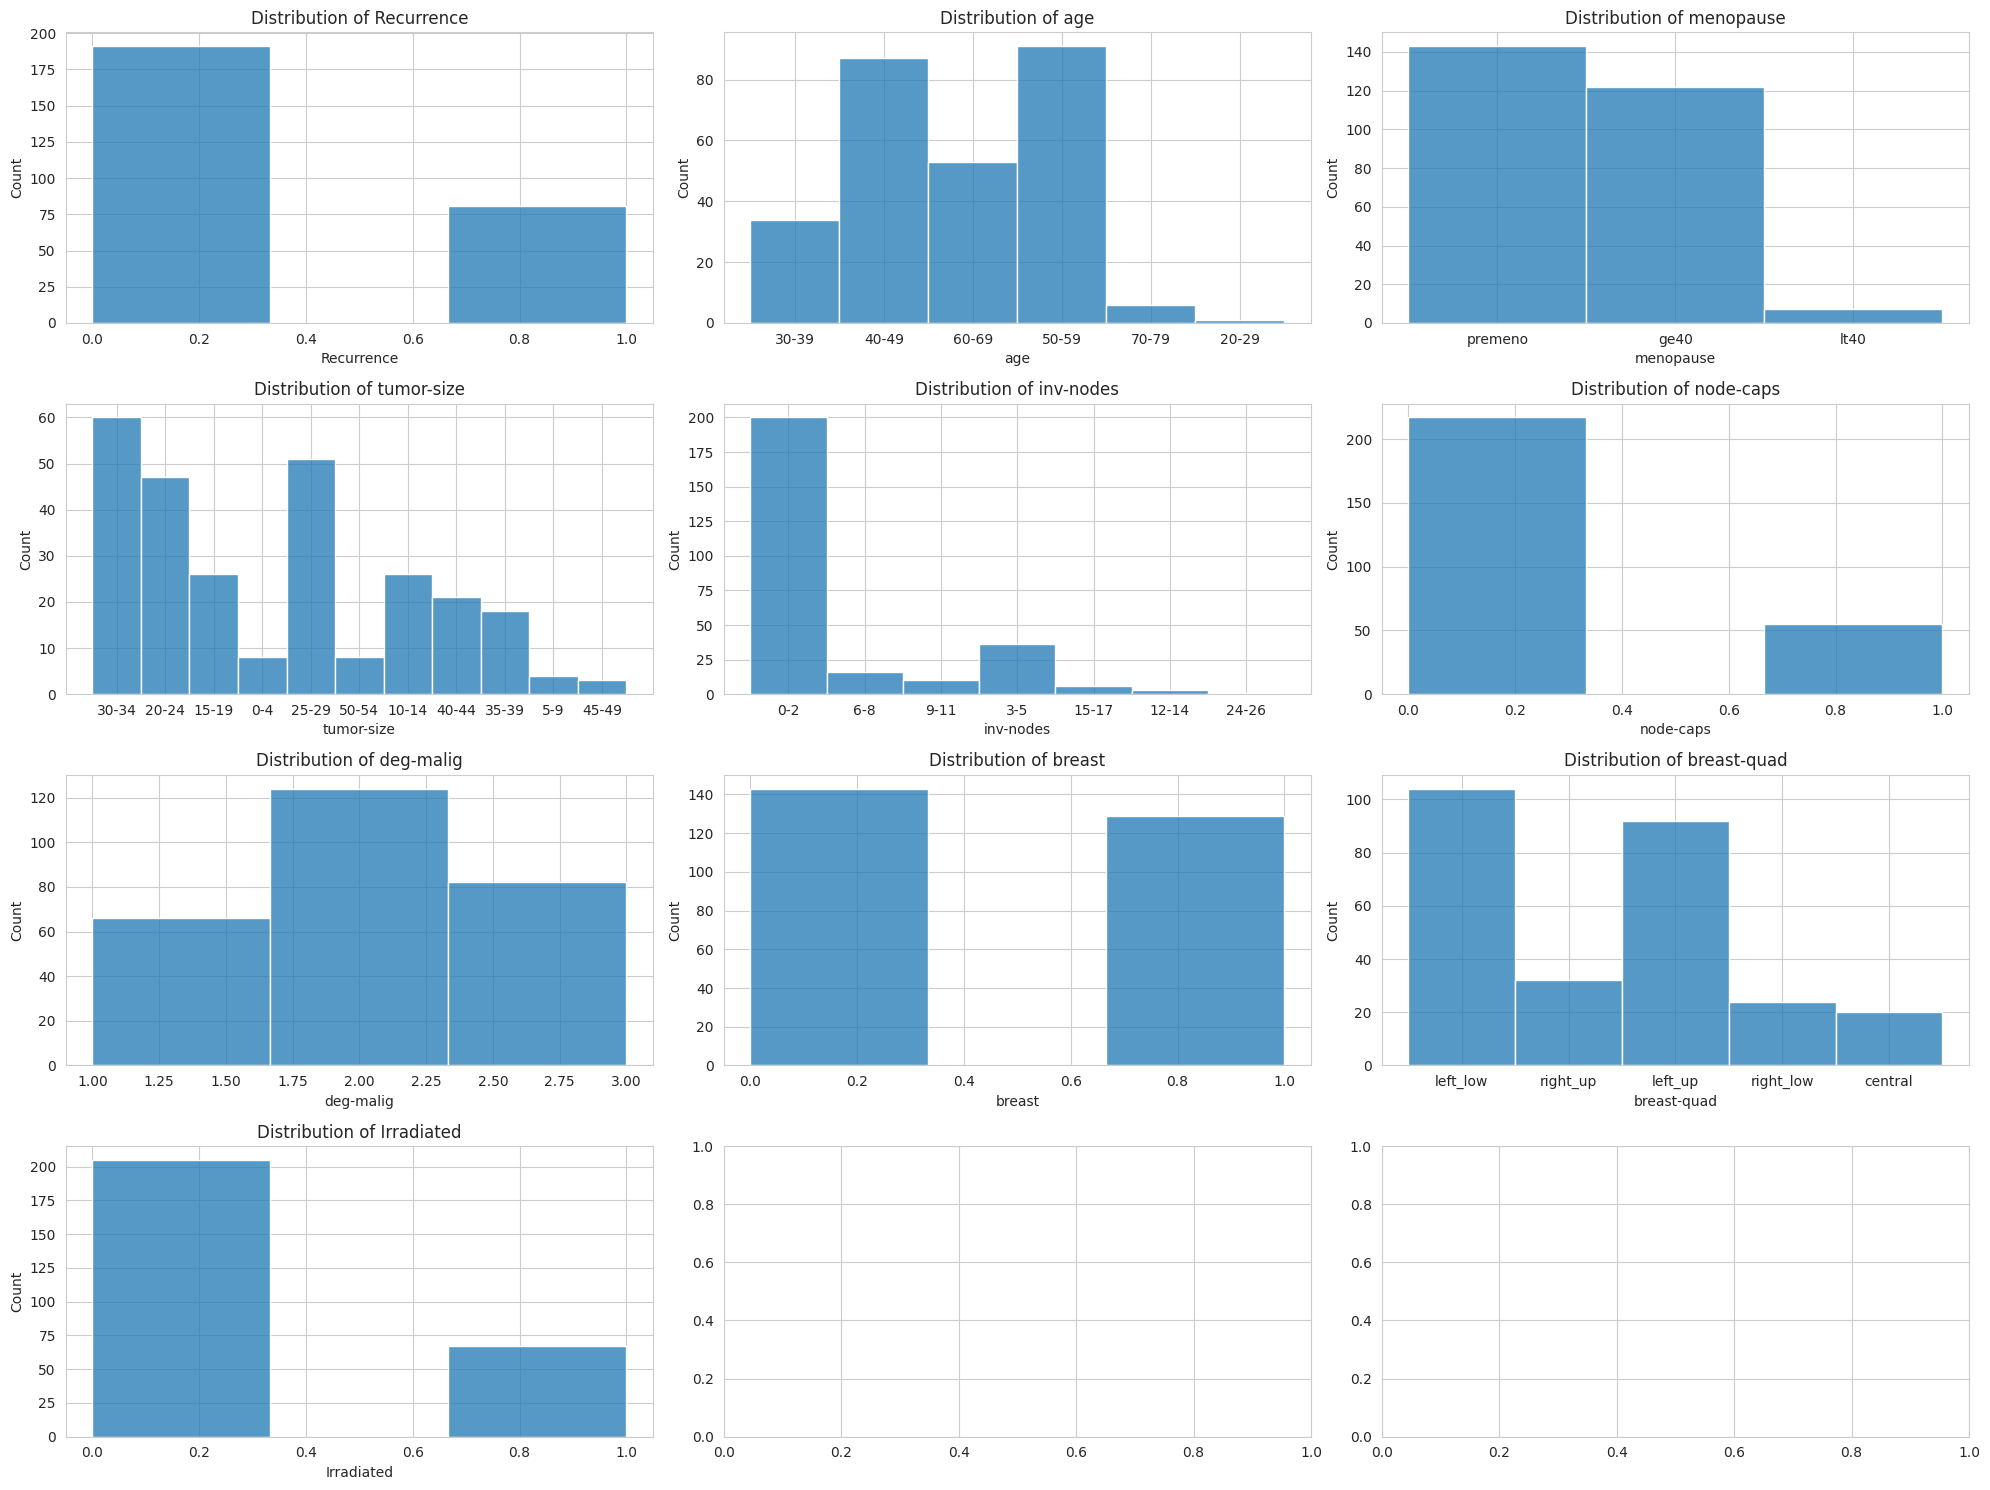

In [51]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Adjusting the subplot layout to accommodate the updated number of variables
fig, ax = plt.subplots(4, 3, figsize=(20, 15))  # Adjusted to 4x3 to fit the additional plot


categorical_columns = ['Recurrence', 'age', 'menopause', 'tumor-size', 'inv-nodes', 'node-caps',
       'deg-malig', 'breast', 'breast-quad','Irradiated']
for i, column in enumerate(categorical_columns, start=0):  # Start from the third plot
    sns.histplot(data[column], bins=3, ax=ax[i//3, i%3], kde=False, orientation='vertical')
    ax[i//3, i%3].set_title(f'Distribution of {column}')


plt.tight_layout()
plt.show()

Changed '?' variables, or bad values, to that of the most common within that column as a way to promote valid replacement. 

Additionally, we see the data is looking quite promising after cleaning out the bad values by replacing them with the most common value for that column, with rows that are most similar to the ones missing a value. As we now are able to see a clearer picture of what the data mostly contains based on the visualizations above. 

Following this, Ordinal encoding was chosen for age, tumor size, and inv-nodes due to the  ranking that corresponds with those variables. While the remaining object variables will be one-hot encoded.

## Performing One-Hot Encoding

In [52]:
# Converts the three uniuqe values in the 'menopause' column to booleans 
data = pd.get_dummies(data, columns=["menopause"], drop_first=True)
# Converts each breast quadrant to a boolean set
data = pd.get_dummies(data, columns=["breast-quad"], drop_first=True)

## Performing Ordinal Encoding

In [53]:
age_map = { "20-29":0, "30-39":1, 
           "40-49":2,"50-59":3,
           "60-69":4,"70-79":5 }

tumor_size_map = {"0-4":0, "5-9":1,
                  "10-14":2,"15-19":3,
                  "20-24":4, "25-29":5,
                  "30-34":6,"35-39":7,
                  "40-44":8, "45-49":9,"50-54":10}
inv_nodes_map = { "0-2":0, "3-5":1, 
                 "6-8":2, "9-11":3,
                 "12-14":4, "15-17":5, "24-26":6 }

data['age'] = data['age'].replace(age_map)
data["tumor-size"] = data["tumor-size"].replace(tumor_size_map)
data["inv-nodes"] = data["inv-nodes"].replace(inv_nodes_map)

/tmp/ipykernel_36/2364085973.py:14: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['age'] = data['age'].replace(age_map)
/tmp/ipykernel_36/2364085973.py:15: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["tumor-size"] = data["tumor-size"].replace(tumor_size_map)
/tmp/ipykernel_36/2364085973.py:16: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set

## Post-Processed Data

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Recurrence             272 non-null    bool 
 1   age                    272 non-null    int64
 2   tumor-size             272 non-null    int64
 3   inv-nodes              272 non-null    int64
 4   node-caps              272 non-null    int64
 5   deg-malig              272 non-null    int64
 6   breast                 272 non-null    int64
 7   Irradiated             272 non-null    int64
 8   menopause_lt40         272 non-null    bool 
 9   menopause_premeno      272 non-null    bool 
 10  breast-quad_left_low   272 non-null    bool 
 11  breast-quad_left_up    272 non-null    bool 
 12  breast-quad_right_low  272 non-null    bool 
 13  breast-quad_right_up   272 non-null    bool 
dtypes: bool(7), int64(7)
memory usage: 16.9 KB


In [55]:
print(f'{data.describe()}\nData Shape: {data.shape}\nData Size: {data.size}')

              age  tumor-size   inv-nodes   node-caps   deg-malig      breast  \
count  272.000000  272.000000  272.000000  272.000000  272.000000  272.000000   
mean     2.658088    4.919118    0.536765    0.202206    2.058824    0.474265   
std      1.011378    2.118466    1.129334    0.402385    0.736649    0.500258   
min      0.000000    0.000000    0.000000    0.000000    1.000000    0.000000   
25%      2.000000    4.000000    0.000000    0.000000    2.000000    0.000000   
50%      3.000000    5.000000    0.000000    0.000000    2.000000    0.000000   
75%      3.000000    6.000000    1.000000    0.000000    3.000000    1.000000   
max      5.000000   10.000000    6.000000    1.000000    3.000000    1.000000   

       Irradiated  
count  272.000000  
mean     0.246324  
std      0.431663  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      0.000000  
max      1.000000  
Data Shape: (272, 14)
Data Size: 3808


The post processed size of our data set is 3808 total elements, of which we have 272 rows and 14 columns. 

# Part Two: ML Model Development, testing & comparison

### Construction of Testing & Training Data

In [56]:
from sklearn.model_selection import train_test_split
X = data.drop(['Recurrence'], axis = 1)
Y = data['Recurrence']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.3, stratify = Y, random_state = 1)
print(f'Training Data: {X_train.shape}\nTesting Data: {X_test.shape}')

Training Data: (190, 13)
Testing Data: (82, 13)


### Logistic Regression Model

In [57]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(loss = 'perceptron', alpha = 0.05)
clf.fit(X_train,Y_train)
accuracy_test = accuracy_score(Y_test, clf.predict(X_test))
accuracy_train = accuracy_score(Y_train, clf.predict(X_train))

Train accuracy: 0.5842105263157895; 
Test accuracy: 0.573170731707317


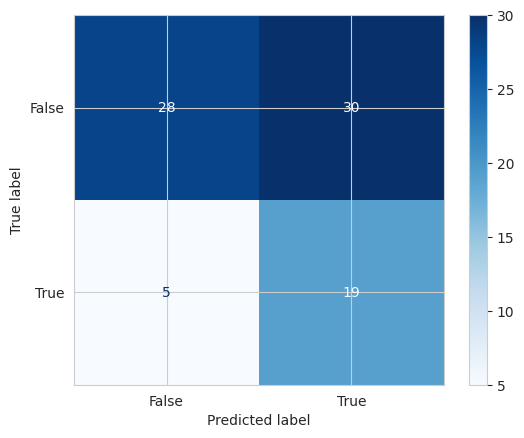

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay
cm_display = ConfusionMatrixDisplay.from_estimator(clf, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)
# Check the accuracy on the test data
accuracy_test=accuracy_score(Y_test, clf.predict(X_test))
# Check accuracy on the training data
accuracy_train=accuracy_score(Y_train, clf.predict(X_train))
print(f"Train accuracy: {accuracy_train}; \nTest accuracy: {accuracy_test}")

In [59]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, clf.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, clf.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.85      0.48      0.62        58
        True       0.39      0.79      0.52        24

    accuracy                           0.57        82
   macro avg       0.62      0.64      0.57        82
weighted avg       0.71      0.57      0.59        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.84      0.50      0.63       133
        True       0.40      0.77      0.53        57

    accuracy                           0.58       190
   macro avg       0.62      0.64      0.58       190
weighted avg       0.71      0.58      0.60       190



### KNN Model

In [60]:
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn_search_recall = KNeighborsClassifier()
# Optimizing Hyperparamter
param_grid = {"n_neighbors": np.arange(1, 100),
             "weights": ['uniform', 'distance']}
# cv parameter stands for cross-validation generator
# specify the recall function to use when scoring
knn_gscv2 = GridSearchCV(knn_search_recall, param_grid, cv=5, scoring="recall")

knn_gscv2.fit(X_train, Y_train)

# hyperparameter values for the best model
print("Best parameters:", knn_gscv2.best_params_)
print("Best score:", knn_gscv2.best_score_)
print("Best Estimator:", knn_gscv2.best_estimator_)
best_recall_knn = knn_gscv2.best_estimator_

Best parameters: {'n_neighbors': 3, 'weights': 'uniform'}
Best score: 0.2727272727272727
Best Estimator: KNeighborsClassifier(n_neighbors=3)


In [61]:
accuracy_test=accuracy_score(Y_test, best_recall_knn.predict(X_test))
print('Accuracy of knn on test data is : {:.2}'.format(accuracy_test))

# Check accuracy on the training data
accuracy_train=accuracy_score(Y_train, best_recall_knn.predict(X_train))
print('Accuracy of knn on train data is : {:.2}'.format(accuracy_train))

Accuracy of knn on test data is : 0.72
Accuracy of knn on train data is : 0.78


Train accuracy: 0.7789473684210526; 
Test accuracy: 0.7195121951219512


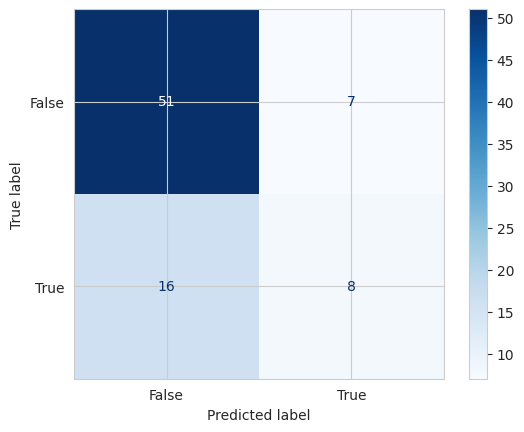

In [62]:
cm_display = ConfusionMatrixDisplay.from_estimator(best_recall_knn, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)
# Check the accuracy on the test data
accuracy_test=accuracy_score(Y_test, best_recall_knn.predict(X_test))
# Check accuracy on the training data
accuracy_train=accuracy_score(Y_train, best_recall_knn.predict(X_train))
print(f"Train accuracy: {accuracy_train}; \nTest accuracy: {accuracy_test}")

In [63]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, best_recall_knn.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, best_recall_knn.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.76      0.88      0.82        58
        True       0.53      0.33      0.41        24

    accuracy                           0.72        82
   macro avg       0.65      0.61      0.61        82
weighted avg       0.69      0.72      0.70        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.79      0.94      0.86       133
        True       0.74      0.40      0.52        57

    accuracy                           0.78       190
   macro avg       0.76      0.67      0.69       190
weighted avg       0.77      0.78      0.76       190



### Decision Trees

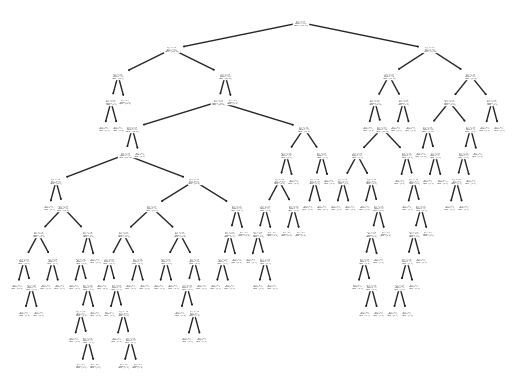

In [64]:
from sklearn.tree import DecisionTreeClassifier
tree_model = DecisionTreeClassifier(random_state=1).fit(X_train, Y_train)
from sklearn import tree
tree.plot_tree(tree_model)
plt.show()
param_grid = {
    "criterion": ['gini','entropy'],
    "max_depth": range(1,10),
    "min_samples_split": range(2,10),
    "min_samples_leaf": range(1,5)
}
tree_gscv = GridSearchCV(tree_model, param_grid, cv = 5, scoring = 'recall',error_score = 'raise')

In [65]:
tree_gscv.fit(X_train,Y_train)
print("Best parameters:", tree_gscv.best_params_)
print("Best score:", tree_gscv.best_score_)
print("Best score:", tree_gscv.best_estimator_)

Best parameters: {'criterion': 'gini', 'max_depth': 1, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.4878787878787879
Best score: DecisionTreeClassifier(max_depth=1, random_state=1)


Train accuracy: 0.7210526315789474; 
Test accuracy: 0.7073170731707317


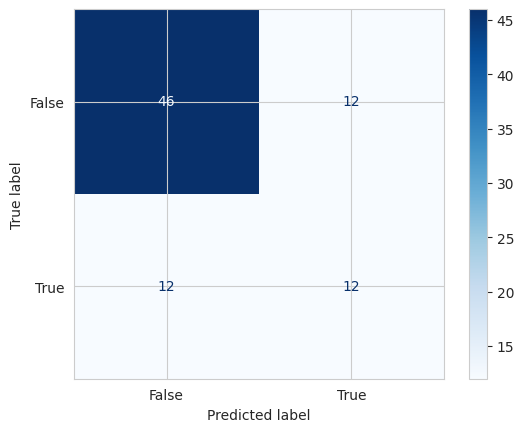

In [66]:
cm_display = ConfusionMatrixDisplay.from_estimator(tree_gscv, X_test, Y_test,
                                               cmap=plt.cm.Blues,normalize=None)
# Check the accuracy on the test data
accuracy_test=accuracy_score(Y_test, tree_gscv.predict(X_test))
# Check accuracy on the training data
accuracy_train=accuracy_score(Y_train, tree_gscv.predict(X_train))
print(f"Train accuracy: {accuracy_train}; \nTest accuracy: {accuracy_test}")

In [67]:
print(f"Performance on TEST\n*******************\n{classification_report(Y_test, tree_gscv.predict(X_test))}")
print(f"Performance on TRAIN\n********************\n{classification_report(Y_train, tree_gscv.predict(X_train))}")

Performance on TEST
*******************
              precision    recall  f1-score   support

       False       0.79      0.79      0.79        58
        True       0.50      0.50      0.50        24

    accuracy                           0.71        82
   macro avg       0.65      0.65      0.65        82
weighted avg       0.71      0.71      0.71        82

Performance on TRAIN
********************
              precision    recall  f1-score   support

       False       0.80      0.80      0.80       133
        True       0.53      0.54      0.54        57

    accuracy                           0.72       190
   macro avg       0.67      0.67      0.67       190
weighted avg       0.72      0.72      0.72       190

